
Preprocessing 


# **Images Augmentation**

Ali Zolfagharian








Here I make a function for image augmentation in a way that create new images, consider the same transformation for the segmentation and bbox, and at the end it add rows with same categories as the original image

Libraries

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import json
from google.cloud import storage


In [6]:
jsonSeries = pd.read_json('gs://foodygs/foodyai_data/Training_2/annotations.json',typ='series')
# jsonseries has three dataframe and it could be retrieved as the following

categories = pd.DataFrame(jsonSeries.categories)  
images = pd.DataFrame(jsonSeries.images)
annotations = pd.DataFrame(jsonSeries.annotations)

In [7]:
nutrition = pd.read_csv('gs://foodygs/Nutrition/nutrition.csv', sep=",", index_col=0)

(-0.5, 425.5, 425.5, -0.5)

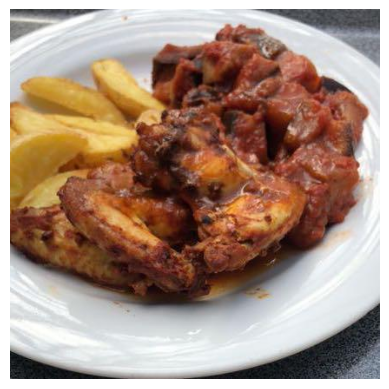

In [16]:
plt.imshow(plt.imread('img/006497.jpg'))
plt.axis('off')

In [19]:
img_006497 = annotations[annotations['image_id']==6497]
img_006497

,id,image_id,category_id,segmentation,area,bbox,iscrowd
2814,100,6497,101148,"[[125.1375, 58.575, 190.1025, 107.565, 157.087...",20134.0,"[9.0525, 1.5975000000000001, 199.6875, 188.505]",0


In [20]:
segmentations_list = list(img_006497['segmentation'])[0]
segmentations = []

for j in range(len(segmentations_list)):
  a_list = segmentations_list[j]
  listX = [x for (i,x) in enumerate(a_list) if i%2==1]
  listY = [x for (i,x) in enumerate(a_list) if i%2==0]
  segmentations.append([listX,listY])

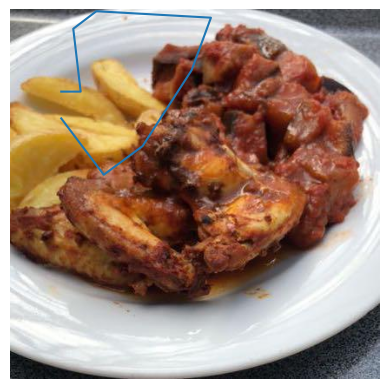

In [29]:
plt.imshow(plt.imread('img/006497.jpg'))
plt.axis('off')

plt.plot(segmentations[0][0],segmentations[0][1])

plt.show()

In [33]:
width = plt.imread('img/006497.jpg').shape[0]
for i in range(len(segmentations)):
    for j in range(len(segmentations[i][0])):
        segmentations[i][0][j] = width - segmentations[i][0][j]


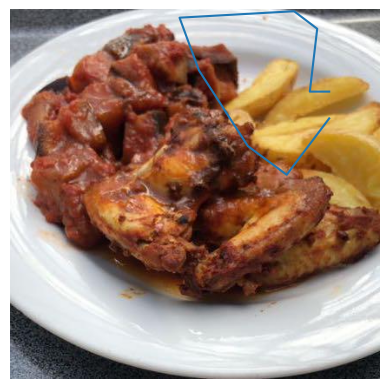

In [35]:
plt.imshow(tf.image.flip_left_right(plt.imread('img/006497.jpg')))
plt.axis('off')

plt.plot(segmentations[0][0],segmentations[0][1])

plt.show()

In [53]:
cat_id = annotations[annotations['image_id']==6497].reset_index()['category_id'][0]
cat_id

101148

In [54]:
categories[categories['id']==cat_id]

,id,name,name_readable,supercategory
79,101148,potato,potato,food


--------------

a new image

(-0.5, 1069.5, 1071.5, -0.5)

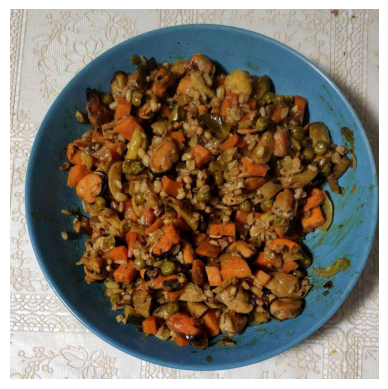

In [60]:
plt.imshow(plt.imread('img/126678.jpg',))
plt.axis('off')

In [63]:
img_126678 = annotations[annotations['image_id']==126678]
img_126678

,id,image_id,category_id,segmentation,area,bbox,iscrowd
98451,180312,126678,100057,"[[574.88724609375, 888.5986639404297, 465.0072...",161880.0,"[186.43866394042968, 175.56724609375001, 771.8...",0


In [64]:
segmentations_list = list(img_126678['segmentation'])[0]
segmentations = []

for j in range(len(segmentations_list)):
  a_list = segmentations_list[j]
  listX = [x for (i,x) in enumerate(a_list) if i%2==1]
  listY = [x for (i,x) in enumerate(a_list) if i%2==0]
  segmentations.append([listX,listY])

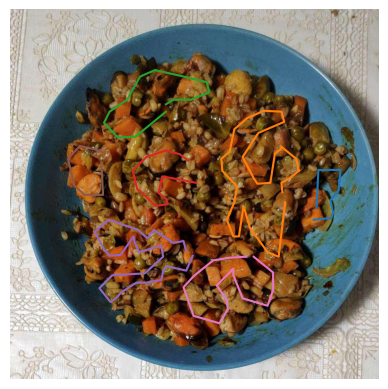

In [66]:
plt.imshow(plt.imread('img/126678.jpg'))
plt.axis('off')

plt.plot(segmentations[0][0],segmentations[0][1])
plt.plot(segmentations[1][0],segmentations[1][1])
plt.plot(segmentations[2][0],segmentations[2][1])
plt.plot(segmentations[3][0],segmentations[3][1])
plt.plot(segmentations[4][0],segmentations[4][1])
plt.plot(segmentations[5][0],segmentations[5][1])
plt.plot(segmentations[6][0],segmentations[6][1])

plt.show()

In [68]:
width = plt.imread('img/126678.jpg').shape[0]
for i in range(len(segmentations)):
    for j in range(len(segmentations[i][0])):
        segmentations[i][0][j] = width - segmentations[i][0][j]

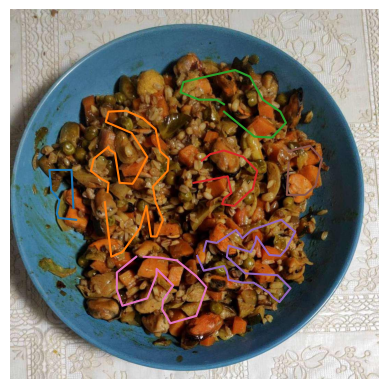

In [70]:
plt.imshow(tf.image.flip_left_right(plt.imread('img/126678.jpg')))
plt.axis('off')


plt.plot(segmentations[0][0],segmentations[0][1])
plt.plot(segmentations[1][0],segmentations[1][1])
plt.plot(segmentations[2][0],segmentations[2][1])
plt.plot(segmentations[3][0],segmentations[3][1])
plt.plot(segmentations[4][0],segmentations[4][1])
plt.plot(segmentations[5][0],segmentations[5][1])
plt.plot(segmentations[6][0],segmentations[6][1])

plt.show()

In [8]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

ModuleNotFoundError: No module named 'detectron2.utils'

In [13]:

dir(detectron2)


['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [30]:
detectron2.

<module 'detectron2' (namespace)>